<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

***Здесь была ячейка с данными соединения к БД!***

In [605]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [458]:
# текст запроса
query_3_1 = f'''
select
    count(id)
from public.vacancies
'''

In [459]:
# результат запроса
df_3_1 = pd.read_sql_query(query_3_1, connection)
df_3_1

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\4045908245.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_1 = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [22]:
# текст запроса
query_3_2 = f'''
select
    count(id)
from public.employers
'''

In [23]:
# результат запроса
df_3_2 = pd.read_sql_query(query_3_2, connection)
df_3_2

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\533540996.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_2 = pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [18]:
# текст запроса
query_3_3 = f'''
select
    count(id)
from public.areas
'''

In [19]:
# результат запроса
df_3_3 = pd.read_sql_query(query_3_3, connection)
df_3_3

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\1395976625.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_3 = pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [20]:
# текст запроса
query_3_4 = f'''
select
    count(id)
from public.industries
'''

In [21]:
# результат запроса
df_3_4 = pd.read_sql_query(query_3_4, connection)
df_3_4

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\854197215.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_4 = pd.read_sql_query(query_3_4, connection)


,count
0,294


***

**Вывыд:** по предварительному анализу БД включает в себя следующие данные:
* количество вакансий - 49 197;
* количесво работодателей - 23501;
* количество регионов - 1362;
* количество сфер деятельности - 294.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [532]:
# текст запроса
query_4_1 = f'''
select
    a.name,
    count(v.id) as cnt
from public.areas a
left join public.vacancies v on v.area_id = a.id
group by
    a.name
order by 
    cnt desc
'''

In [533]:
# результат запроса
df_4_1 = pd.read_sql_query(query_4_1, connection)
df_4_1

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\620650199.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_1 = pd.read_sql_query(query_4_1, connection)


,name,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
1357,Багаевская,0
1358,Пролетарск,0
1359,Седельниково,0
1360,Инской,0


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [33]:
# текст запроса
query_4_2 = f'''
select
    count(id) as cnt
from public.vacancies
where 
    salary_from <> 0 or salary_to <> 0
'''

In [34]:
# результат запроса
df_4_2 = pd.read_sql_query(query_4_2, connection)
df_4_2

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\3746829199.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_2 = pd.read_sql_query(query_4_2, connection)


,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [39]:
# текст запроса
query_4_3 = f'''
select
    round(avg(salary_from), 0) as avg_min,
    round(avg(salary_to), 0) as avg_max
from public.vacancies
'''

In [40]:
# результат запроса
df_4_3 = pd.read_sql_query(query_4_3, connection)
df_4_3

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\3595259731.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_3 = pd.read_sql_query(query_4_3, connection)


,avg_min,avg_max
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [47]:
# текст запроса
query_4_4 = f'''
select
    schedule, 
    employment,
    count(id) as cnt
from public.vacancies
group by
    schedule, 
    employment
order by
    cnt desc
offset 1 limit 1 
'''

In [48]:
# результат запроса
df_4_4 = pd.read_sql_query(query_4_4, connection)
df_4_4

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\2028972612.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_4 = pd.read_sql_query(query_4_4, connection)


,schedule,employment,cnt
0,Удаленная работа,Полная занятость,7802


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [49]:
# текст запроса
query_4_5 = f'''
select
    experience
from public.vacancies
group by
    experience
order by
    count(id)
'''

In [50]:
# результат запроса
df_4_5 = pd.read_sql_query(query_4_5, connection)
df_4_5

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\210463167.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_5 = pd.read_sql_query(query_4_5, connection)


,experience
0,Более 6 лет
1,Нет опыта
2,От 3 до 6 лет
3,От 1 года до 3 лет


***

**Вывод:** по результатам детального анализа данных можно сделать следующие выводы:
* наибольшее количество вакансий наблюдается в крупных-городах, а точнее столицах и городах-миллионниках. Так на 1 месте - Москва (5 333 вакансий), на втором - Санкт-Петербург (2 851 вакансий), на третьем - Минск (2 112 вакансий);
* у 49% вакансий от общего числа вакансий (24 073 вакансии) заполнено хотя бы одно поле по вилке заработной платы;
* средняя вилка по заработной плате находится в диапазоне от 71 065 руб. до 110 537 руб.;
* наиболее предпочтительным видом трудоустройства является полная занятость с удаленным графиком работы;
* согласно перечню вакансий наиболее востребованы специалисты с опытом работы свыше 6 лет, на втором месте - вакансий, на которые не требуется опыт работы, после специалисты с опытом работы от 3 до 6 лет, и в заключении - от 1 года до 3 лет. 


# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [53]:
# текст запроса
query_5_1 = f'''
select
    e.name
from public.employers e
left join public.vacancies v on v.employer_id = e.id
group by
    e.name
order by
    count(v.id) desc
limit 5
'''

In [54]:
# результат запроса
df_5_1 = pd.read_sql_query(query_5_1, connection)
df_5_1

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\1147638897.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_1 = pd.read_sql_query(query_5_1, connection)


,name
0,Яндекс
1,Ростелеком
2,Тинькофф
3,СБЕР
4,Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [492]:
# текст запроса
query_5_2 = f'''
select 
    distinct aggr.name,
    sum(case when aggr.type = 'vac' then aggr.count_vac end) as cnt_vac,
    sum(case when aggr.type = 'emp' then aggr.count_vac end) as cnt_emp
from
((select
    distinct a.name as name,
    'vac' as type,
    count(v.id) as count_vac
from public.vacancies v 
left join public.areas a on v.area_id = a.id
group by
    a.name
order by
    count_vac)

union all

(select
    distinct a.name as name,
    'emp' as type,
    count(e.id) as count_emp
from public.employers e
left join public.areas a on e.area = a.id
group by
    a.name
order by
    count_emp)) as aggr
group by
    aggr.name
order by
    cnt_vac desc NULLS FIRST ,
    cnt_emp desc
'''

In [493]:
# результат запроса
df_5_2 = pd.read_sql_query(query_5_2, connection)
df_5_2

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\2306256317.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_2 = pd.read_sql_query(query_5_2, connection)


,name,cnt_vac,cnt_emp
0,Россия,NaN,410.0
1,Казахстан,NaN,207.0
2,Московская область,NaN,75.0
3,Краснодарский край,NaN,19.0
4,Беларусь,NaN,18.0
...,...,...,...
950,Сириус,1.0,1.0
951,Тихорецк,1.0,1.0
952,Шарыпово,1.0,1.0
953,Шахтинск,1.0,1.0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [67]:
# текст запроса
query_5_3 = f'''
select
    e.name,
    count(distinct v.area_id) as count_area
from public.employers e
left join public.vacancies v on v.employer_id = e.id
group by
    e.name
order by
    count_area desc
'''

In [68]:
# результат запроса
df_5_3 = pd.read_sql_query(query_5_3, connection)
df_5_3

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\133400711.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_3 = pd.read_sql_query(query_5_3, connection)


,name,count_area
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23170,СДЕЛКА,0
23171,Alandr Group,0
23172,СДК,0
23173,Lemon Land Lombard,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [91]:
# текст запроса
query_5_4 = f'''
select 
count(a.id) as cnt
    from (select
            id
        from public.employers
        except
        select
            employer_id
        from public.employers_industries) a
'''

In [92]:
# результат запроса
df_5_4 = pd.read_sql_query(query_5_4, connection)
df_5_4

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\1045119256.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_4 = pd.read_sql_query(query_5_4, connection)


,cnt
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [99]:
# текст запроса
query_5_5 = f'''
select 
    e.name
from public.employers_industries ei
left join public.employers e on e.id = ei.employer_id
group by
    e.name
having count(industry_id) = 4
order by
    e.name
offset 2 limit 1
'''

In [100]:
# результат запроса
df_5_5 = pd.read_sql_query(query_5_5, connection)
df_5_5

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\4025176131.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_5 = pd.read_sql_query(query_5_5, connection)


,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [103]:
# текст запроса
query_5_6 = f'''
select 
    count(ei.employer_id) as cnt
from public.employers_industries ei
left join public.industries i on i.id = ei.industry_id
where i.name = 'Разработка программного обеспечения'
'''

In [104]:
# результат запроса
df_5_6 = pd.read_sql_query(query_5_6, connection)
df_5_6

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\2713946032.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_6 = pd.read_sql_query(query_5_6, connection)


,cnt
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [186]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup

url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
response = requests.get(url, verify=False)
page = BeautifulSoup(response.text, 'html.parser')

cities = [] # создаем пустой кортеж
tables = page.find_all("table") #получаем список таблиц
for table in tables:
    links = table.find_all("a") # получаем список всех ссылок
    for link in links:
            try: 
                cities.append(link['title']) #добавляем информацию в список
            except KeyError:
                pass
cities =  tuple(cities[2:18]) #лучше способа не нашел пока, как ограничить только нужные города, тольк сорезом
print(cities)

C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ru.wikipedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')


In [224]:
# текст запроса
query_5_7 = f'''
select 
    a.name as name, 
    count(v.id) as cnt
from public.vacancies v
left join public.employers e on v.employer_id = e.id
left join public.areas as a on a.id = v.area_id
where e.name = 'Яндекс' and a.name in {cities}
group by
    a.name
union all
select 
    'Total',
    count(v.id) as cnt
from public.vacancies v
left join public.employers e on v.employer_id = e.id
left join public.areas as a on a.id = v.area_id
where e.name = 'Яндекс' and a.name in {cities}
order by 
    cnt
'''

In [225]:
# результат запроса
df_5_7= pd.read_sql_query(query_5_7, connection)
df_5_7

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\1351048349.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_7= pd.read_sql_query(query_5_7, connection)


,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

**Вывод:** по итогам анализа работодателей можно сделать следующие выводы:
* топ-5 работодателей по количеству вакансий в порядке убывания: Яндекс, Ростелеком, Тинькофф, СБЕР, Газпром нефть;
* работодатели, которые в качестве региона имеют не город, а страну, имеют множество работодателей, но не имеют при этом вакансий: Россия, Казахстан, Московская область, Краснодарский край, Ростовская область;
* Наибольшее количество регионов, в которых размещены вакансии, предлагает компания Яндекс;
* 8 419 компаний не указали свою сферу деятельности;
* 3 553 компаний указали в сфере деятельности "Разработку программного обеспечения";
* компания Яндекс разместила 485 вакансий в городах-миллионниках, с наибольшим количеством в порядке убывания в Москве (54 вакансии), Санкт-Петербурге (42 вакансии) и Екатеринбурге (39 вакансий)

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [229]:
# текст запроса
query_6_1 = f'''
select 
    count(id) as cnt
from public.vacancies 
where lower(name) like '%data%' or lower(name) like '%данн%'
'''

In [230]:
# результат запроса
df_6_1 = pd.read_sql_query(query_6_1, connection)
df_6_1

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\1281472032.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_1 = pd.read_sql_query(query_6_1, connection)


,cnt
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [432]:
# текст запроса
query_6_2 = f'''
select 
    --experience,
    --employment,
    count(id) as cnt
from public.vacancies 
where (name ilike '%data scientist%' 
        or name ilike '%data science%'
        or name ilike '%исследователь данных%'
        or (name like '%ML%' and name not ilike '%html%')
        or name ilike '%machine learning%'
        or name ilike '%машинн%обучен%'
        )
        and (name ilike '%junior%'
        or experience ilike '%Нет опыта%' 
        or employment ilike '%Стажировка%')
    --group by
        --experience,
        --employment
    
'''

In [433]:
# результат запроса
df_6_2 = pd.read_sql_query(query_6_2, connection)
df_6_2

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\118162426.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_2 = pd.read_sql_query(query_6_2, connection)


,cnt
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [393]:
# текст запроса
query_6_3 = f'''
select 
    --experience,
    --employment,
    --key_skills,
    count(id) as cnt
from public.vacancies 
where (name ilike '%data scientist%' 
        or name ilike '%data science%'
        or name ilike '%исследователь данных%'
        or (name like '%ML%' and name not ilike '%html%')
        or name ilike '%machine learning%'
        or name ilike '%машинн%обучен%'
        )
        and (key_skills ilike '%sql%' or key_skills ilike '%postgres%')
   -- group by
       -- experience,
        --employment,
        --key_skills
'''

In [394]:
# результат запроса
df_6_3 = pd.read_sql_query(query_6_3, connection)
df_6_3

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\3310962512.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_3 = pd.read_sql_query(query_6_3, connection)


,cnt
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [395]:
# текст запроса
query_6_4 = f'''
select 
    count(id) as cnt
from public.vacancies 
where (name ilike '%data scientist%' 
        or name ilike '%data science%'
        or name ilike '%исследователь данных%'
        or (name like '%ML%' and name not ilike '%html%')
        or name ilike '%machine learning%'
        or name ilike '%машинн%обучен%'
        )
        and (key_skills ilike '%python%')
'''

In [396]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
df_6_4

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\614304167.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_4 = pd.read_sql_query(query_6_4, connection)


,cnt
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [414]:
# текст запроса
query_6_5 = f'''
select 
    avg(length(key_skills) - length(replace(key_skills, '\t', '')) + 1) as cnt
from public.vacancies 
where (name ilike '%data scientist%' 
        or name ilike '%data science%'
        or name ilike '%исследователь данных%'
        or (name like '%ML%' and name not ilike '%html%')
        or name ilike '%machine learning%'
        or name ilike '%машинн%обучен%'
        ) and key_skills not ilike '%none%'
'''

In [415]:
# результат запроса
df_6_5 = pd.read_sql_query(query_6_5, connection)
df_6_5

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\4089566367.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_5 = pd.read_sql_query(query_6_5, connection)


,cnt
0,6.406032


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [430]:
# текст запроса
query_6_6 = f'''
select 
    distinct experience,
    round(avg(
        case when salary_from is not Null and salary_to is not Null then (salary_from + salary_to)/2 
        when salary_from is not Null and salary_to is Null then salary_from else salary_to end), 0) as avg_salary
from public.vacancies 
where (name ilike '%data scientist%' 
        or name ilike '%data science%'
        or name ilike '%исследователь данных%'
        or (name like '%ML%' and name not ilike '%html%')
        or name ilike '%machine learning%'
        or name ilike '%машинн%обучен%'
        ) and key_skills not ilike '%none%'
        and (salary_from <> 0 or salary_to <> 0) and experience = 'От 3 до 6 лет'
group by
    experience
'''

In [431]:
# результат запроса
df_6_6 = pd.read_sql_query(query_6_6, connection)
df_6_6

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\2297777544.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_6 = pd.read_sql_query(query_6_6, connection)


,experience,avg_salary
0,От 3 до 6 лет,243115.0


***

**Вывод:** по результатам предметного анализа вакансий, связанных с данными, можно сделать следующие выводы:
* 1 771 вакансия из всего перечня связаны с данными;
* из них 51 вакансия предлагает работу для начинающих специалистов;
* для 201 вакансии (без учета начинающих специалистов) обязательными навыками являются владение SQL или postgres;
* для 351 вакансии (без учета начинающих специалистов) обязательнымм навыком является владение python;
* пордяка 6,4 навыков являюся средним значением для вакансий в области данных;
* среднее предложение по заработной платы для специалистов с опытом рабооты от 3 до 6 лет составляет 243 115 руб.

# Общий вывод по проекту

**Общий вывод по проекту:** по итогам ананлиза вакансий на HH.ru можно сделать ряд следующих выводов: 
* в базе данных содержится около 49 тыс. вакансий среди 23 тыс. работодателей;
* вакансии рассредоточены среди 1,3 тыс городов России и стран СНГ. Наибольшее количество вакансий находится в городах-столицах и крупных городах-миллионниках;
* средняя вилка по заработной плате находится в диапазоне от 71 065 руб. до 110 537 руб.;
* если смотреть на вакансии в сфере данных, то количество вакансий всего 1,8 тыс., что составляет примерно 4% от общего числа вакансий. При этом для начинающих специалистов предложений совсем мало, все 51 вакансия, что говорит о том, что на рынке существует дефицит вакансий в данной сфере;
* если говорить о вакансия в сфере данных, то для большинства из них требуется знание sql и python. При этом в среднем необходимо обладать 6 навыками работы.


# Дополнительные исследования 

In [565]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Нарисуем круговую диаграмму, отражающую долю количества вакансий по топ-10 городам, остальные города агрегируем в признак "прочие города".

In [547]:
# подготовим данные для графика
df_4_1_r = df_4_1.copy()
df_4_1_lrg = df_4_1_r.nlargest(10, columns=['cnt'])
list_lrg = list(df_4_1_lrg['name'])

In [548]:
# оставляем 10 городов с наибольшим количеством вакансий
df_4_1_r['name'] = df_4_1_r['name'].apply(lambda x: x if x in list_lrg else 'прочие города')

In [549]:
df_4_1_r = df_4_1_r.groupby(by='name')['cnt'].sum().sort_values(ascending=False)

In [569]:
sum_cnt = df_4_1_r.sum()

In [560]:
# посчитаем долю каждого города в общем количестве вакансий
df_4_1_r_pc = df_4_1_r.apply(lambda x: round(x / sum_cnt, 2))

In [561]:
df_4_1_r_pc

name
прочие города      0.56
Москва             0.11
Санкт-Петербург    0.06
Минск              0.04
Новосибирск        0.04
Алматы             0.04
Екатеринбург       0.03
Нижний Новгород    0.03
Казань             0.03
Краснодар          0.03
Самара             0.02
Name: cnt, dtype: float64

In [621]:
# фомируем график
fig = px.pie(df_4_1_r_pc, values='cnt', 
            names=df_4_1_r_pc.index, 
            height=400,
            width=800, 
            hole=0.3,
            title='Доля вакансий по городам')

fig.write_html("charts/pie.html")
fig.show()

[Ссылка на график в формате png](https://github.com/vadimkopytko/learning/blob/main/SkillFactory/PY-20_PROJECT-2/charts/pie.png)

**Вывыод:** 43% вакансий сосредоточены в топ-10 крупных городов из всех данных. При этом 17% приходится на Москву и Санкт-Петербург. То есть в небольших городах, общая доля которых 56,6% вакансий, не располагаются крупные компании, которые предлагают значительнок количество вакансий.

---

Посмотрим на среднюю вилку заработной платы топ-15 компаний по убыванию максимальной заработной платы по убыванию разницы между средней минимальной и средней маскимальной заработной платой.

In [593]:
# выгружаем данные в нужном срезе
query1 = f'''
select
    e.name,
    round(avg(v.salary_from), 0) as avg_min,
    round(avg(v.salary_to), 0) as avg_max
from public.vacancies v
left join public.employers e on v.employer_id = e.id
where v.salary_from <> 0 and v.salary_to <> 0
group by 
    e.name
order by
    (round(avg(v.salary_to), 0) - round(avg(v.salary_from), 0)) desc
limit 15
    '''

In [594]:
df_sal = pd.read_sql_query(query1, connection)
df_sal

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\3056986612.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,avg_min,avg_max
0,RuWork,175346.0,935176.0
1,ЦТП,350000.0,950000.0
2,ШтафунСофт,40000.0,600000.0
3,Итон,200000.0,700000.0
4,Матулян Размик Ардашович,50000.0,500000.0
5,DEVIR,12205.0,427164.0
6,Агентство недвижимости ЛЕТО,350000.0,750000.0
7,А-Соль,100000.0,500000.0
8,iBEC Systems,224410.0,561024.0
9,Петухова Алия,393200.0,712200.0


In [620]:
# формируем график
fig = px.line(
    data_frame=df_sal,
    x='name',
    y=['avg_min', 'avg_max'],
    height=400,
    width=800, 
    title='Разброс вилки заработной платы топ-15 компаний')

fig.update_layout(xaxis_title='Наименование компании',
                  yaxis_title='Уровень заработной платы')

fig.write_html("charts/line.html")
fig.show()

[Ссылка на график в формате png](https://github.com/vadimkopytko/learning/blob/main/SkillFactory/PY-20_PROJECT-2/charts/line.png)

**Вывод:** по итогам графика видно, что у топ-15 компаний наблюдается значительный разброс в заработной плате, что может быть связано с наличием различного рода вакансий, сильно отличающихся по грейдам.

---

In [607]:
# выгружаем данные в нужном срезе
query2 = f'''
select
    distinct experience,
    schedule,
    count(id) as cnt
from public.vacancies
group by 
    experience,
    schedule
    '''

In [608]:
df_emp_sch = pd.read_sql_query(query2, connection)
df_emp_sch

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_23940\565928518.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience,schedule,cnt
0,Более 6 лет,Вахтовый метод,20
1,Более 6 лет,Гибкий график,48
2,Более 6 лет,Полный день,1040
3,Более 6 лет,Сменный график,1
4,Более 6 лет,Удаленная работа,228
5,Нет опыта,Вахтовый метод,10
6,Нет опыта,Гибкий график,378
7,Нет опыта,Полный день,4505
8,Нет опыта,Сменный график,475
9,Нет опыта,Удаленная работа,1829


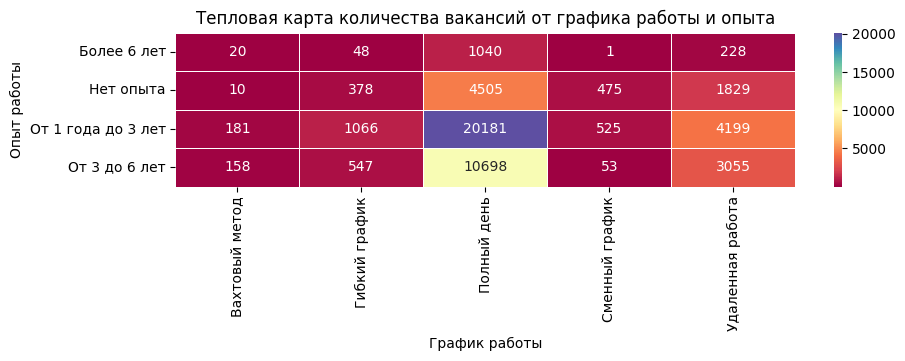

In [617]:
df_table = df_emp_sch.pivot_table(values='cnt',
                                      columns = 'schedule',
                                      index = 'experience',
                                      aggfunc='sum'   
)

fig = plt.figure(figsize=(10, 2))
heatmap = sns.heatmap(
    data=df_table, 
    cmap='Spectral',
    linewidths=.7,
    annot=True,
    cbar=True,
    square=False,
    fmt = '.0f'
)
heatmap.set_title('Тепловая карта количества вакансий от графика работы и опыта', fontsize=12)
heatmap.set_xlabel('График работы')
heatmap.set_ylabel('Опыт работы');

**Вывод:** по результатам ананлиза в требованиях вакансии для любого опыта работы превалирует график работы - Полный день. При этом 25% вакансии без опыта предлагаются сразу удаленный график работы, что не очень хорошо для молодых специалистов, так как удаленный график работы не позволяет в полной мере погрузиться в рабочий процесс. Вахтовый метод - один из самых непопулярных вариантов работы.